In [37]:
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import LinearSVC
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import pandas as pd
from sklearn.pipeline import Pipeline as SkPipeline
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    precision_recall_curve, average_precision_score, roc_curve, roc_auc_score
)
from imblearn.pipeline import Pipeline

## Load & peek

In [3]:
df = pd.read_csv("creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


## Null Values

In [4]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## Duplicates/outliers

In [5]:
df.duplicated().sum()

np.int64(1081)

In [6]:
df.drop_duplicates().head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df.shape

(284807, 31)

In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [10]:
df.info

<bound method DataFrame.info of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  

## Class imbalance check


Class counts:
 Class
0    284315
1       492
Name: count, dtype: int64


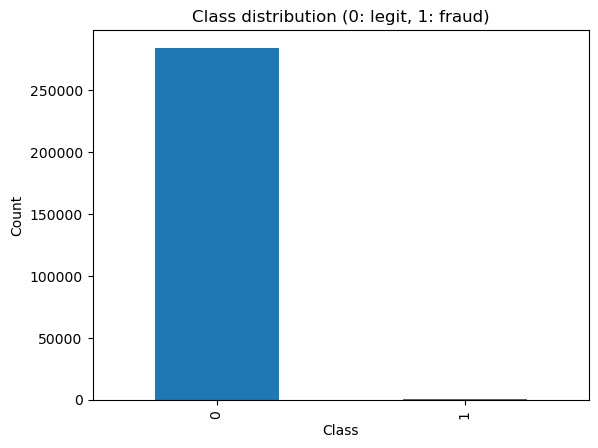

In [11]:
class_counts = df["Class"].value_counts().sort_index()  # 0=legit, 1=fraud
print("\nClass counts:\n", class_counts)

ax = class_counts.plot(kind="bar")
ax.set_title("Class distribution (0: legit, 1: fraud)")
ax.set_ylabel("Count"); plt.show()

## Distributions for key features (Amount & Time) split by class

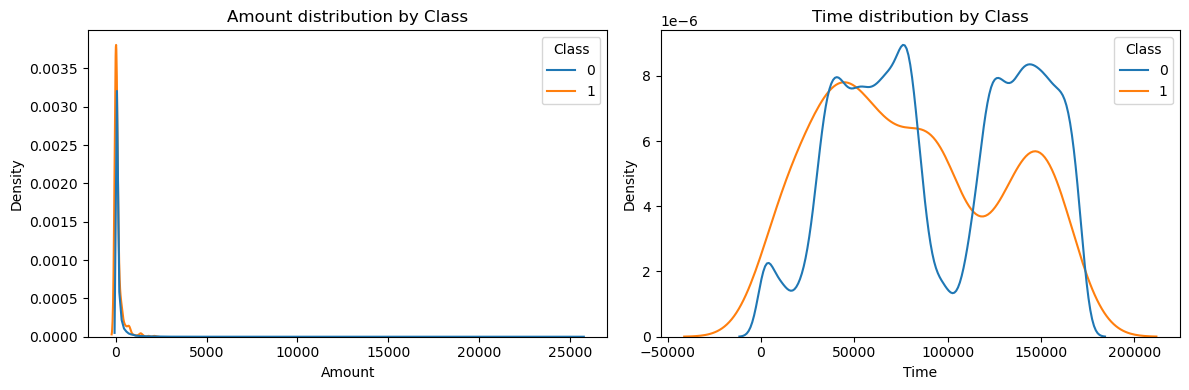

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
sns.kdeplot(data=df, x="Amount", hue="Class", common_norm=False, ax=axes[0])
axes[0].set_title("Amount distribution by Class")

sns.kdeplot(data=df, x="Time", hue="Class", common_norm=False, ax=axes[1])
axes[1].set_title("Time distribution by Class")
plt.tight_layout(); plt.show()

## Features/target

In [13]:
y = df["Class"].astype(int)
X = df.drop(columns="Class")

## Train/test split (STRATIFIED to preserve fraud ratio)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)

In [15]:
try:
    from xgboost import XGBClassifier
    XGB_OK = True
except Exception:
    XGB_OK = False

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

plt.rcParams["figure.figsize"] = (7,4)
sns.set(style="whitegrid")

## Convenience

In [16]:
pos_weight = (y_train == 0).sum() / max(1, (y_train == 1).sum())
print(f"scale_pos_weight (neg/pos): {pos_weight:.2f}")

scale_pos_weight (neg/pos): 577.29


## Pipelines

In [17]:
models = {
    "Logistic Regression": SkPipeline([
        ("scaler", StandardScaler(with_mean=False)),
        ("clf", LogisticRegression(max_iter=2000, class_weight="balanced", random_state=RANDOM_STATE))
    ]),
    "Decision Tree": DecisionTreeClassifier(
        max_depth=12, min_samples_leaf=2, class_weight="balanced", random_state=RANDOM_STATE
    ),
    "Random Forest": RandomForestClassifier(
        n_estimators=300, n_jobs=-1, class_weight="balanced", random_state=RANDOM_STATE
    ),
    "SVM (RBF)": SkPipeline([
        ("scaler", StandardScaler(with_mean=False)),
        ("clf", SVC(kernel="rbf", C=1.0, gamma="scale", class_weight="balanced",
                    probability=True, random_state=RANDOM_STATE))
    ])
}

if XGB_OK:
    models["XGBoost"] = XGBClassifier(
        objective="binary:logistic",
        tree_method="hist",
        n_estimators=400, max_depth=6, learning_rate=0.1,
        subsample=0.9, colsample_bytree=0.8,
        scale_pos_weight=pos_weight,
        n_jobs=-1, random_state=RANDOM_STATE,
        eval_metric="auc"
    )
else:
    print("⚠️ XGBoost not installed; skipping it.")

## Evaluation Helpers (Confusion, ROC-AUC, PR-AUC)

In [18]:
def get_scores(model, Xte):
    """Return prob scores for positive class (or decision function)."""
    if hasattr(model, "predict_proba"):
        return model.predict_proba(Xte)[:, 1]
    if hasattr(model, "decision_function"):
        s = model.decision_function(Xte)
        # scale to 0..1 for plotting if it's not prob
        s = (s - s.min()) / (s.max() - s.min() + 1e-12)
        return s
    # fallback to predictions (degraded)
    return model.predict(Xte)

def evaluate_model(name, model, Xtr, ytr, Xte, yte):
    t0 = time.perf_counter()
    model.fit(Xtr, ytr)
    train_time = time.perf_counter() - t0

    y_pred = model.predict(Xte)
    y_score = get_scores(model, Xte)

    acc  = accuracy_score(yte, y_pred)
    roc  = roc_auc_score(yte, y_score)
    ap   = average_precision_score(yte, y_score)   # PR-AUC
    rep  = classification_report(yte, y_pred, digits=4)
    cm   = confusion_matrix(yte, y_pred)

    print(f"\n=== {name} ===")
    print(f"Accuracy: {acc:.4f} | ROC-AUC: {roc:.4f} | PR-AUC: {ap:.4f} | Train: {train_time:.2f}s")
    print(rep)

    return {
        "model": name, "accuracy": acc, "roc_auc": roc, "pr_auc": ap,
        "train_time_s": train_time, "y_pred": y_pred, "y_score": y_score, "cm": cm, "est": model
    }


> Confusion matrix: a 2×2 table (for binary) showing TP, FP, TN, FN. It tells you exactly how many frauds were caught or missed and how many normal transactions were wrongly flagged.

> Classification report: prints precision, recall, and F1-score for each class plus averages. It’s much more informative than accuracy on imbalanced data.

> ROC-AUC: measures how well the model ranks fraud above non-fraud across all thresholds. Higher is better separation overall.

> PR-AUC (Average Precision): focuses on precision vs recall for the positive class. It’s usually the most telling metric when fraud is rare, so we use it alongside ROC-AUC.

## Logistic Regression

In [19]:
lr = SkPipeline([
    ("scaler", StandardScaler(with_mean=False)),
    ("clf", LogisticRegression(max_iter=2000, class_weight="balanced", random_state=42))
])
lr_res = evaluate_model("Logistic Regression", lr, X_train, y_train, X_test, y_test)


=== Logistic Regression ===
Accuracy: 0.9755 | ROC-AUC: 0.9721 | PR-AUC: 0.7204 | Train: 2.92s
              precision    recall  f1-score   support

           0     0.9999    0.9756    0.9876     56864
           1     0.0609    0.9184    0.1143        98

    accuracy                         0.9755     56962
   macro avg     0.5304    0.9470    0.5509     56962
weighted avg     0.9982    0.9755    0.9861     56962



## Decision Tree

In [20]:
dt = DecisionTreeClassifier(max_depth=12, min_samples_leaf=2,
                            class_weight="balanced", random_state=42)
dt_res = evaluate_model("Decision Tree", dt, X_train, y_train, X_test, y_test)


=== Decision Tree ===
Accuracy: 0.9936 | ROC-AUC: 0.8917 | PR-AUC: 0.4561 | Train: 31.80s
              precision    recall  f1-score   support

           0     0.9996    0.9940    0.9968     56864
           1     0.1829    0.7857    0.2967        98

    accuracy                         0.9936     56962
   macro avg     0.5913    0.8898    0.6468     56962
weighted avg     0.9982    0.9936    0.9956     56962



## Random Forest

In [21]:
rf = RandomForestClassifier(n_estimators=300, n_jobs=-1,
                            class_weight="balanced", random_state=42)
rf_res = evaluate_model("Random Forest", rf, X_train, y_train, X_test, y_test)



=== Random Forest ===
Accuracy: 0.9995 | ROC-AUC: 0.9567 | PR-AUC: 0.8610 | Train: 198.07s
              precision    recall  f1-score   support

           0     0.9996    0.9999    0.9998     56864
           1     0.9615    0.7653    0.8523        98

    accuracy                         0.9995     56962
   macro avg     0.9806    0.8826    0.9260     56962
weighted avg     0.9995    0.9995    0.9995     56962



## SVM (RBF)

In [22]:
svm = SkPipeline([
    ("scaler", StandardScaler(with_mean=False)),
    ("clf", SVC(kernel="rbf", probability=True, class_weight="balanced", random_state=42))
])
svm_res = evaluate_model("SVM (RBF)", svm, X_train, y_train, X_test, y_test)



=== SVM (RBF) ===
Accuracy: 0.9965 | ROC-AUC: 0.9734 | PR-AUC: 0.4765 | Train: 40728.83s
              precision    recall  f1-score   support

           0     0.9996    0.9969    0.9982     56864
           1     0.2980    0.7755    0.4306        98

    accuracy                         0.9965     56962
   macro avg     0.6488    0.8862    0.7144     56962
weighted avg     0.9984    0.9965    0.9973     56962



## XGBoost

In [23]:
try:
    from xgboost import XGBClassifier
    pos_weight = (y_train == 0).sum() / max(1, (y_train == 1).sum())
    xgb = XGBClassifier(
        objective="binary:logistic", tree_method="hist",
        n_estimators=400, max_depth=6, learning_rate=0.1,
        subsample=0.9, colsample_bytree=0.8,
        scale_pos_weight=pos_weight, n_jobs=-1, random_state=42,
        eval_metric="auc"
    )
    xgb_res = evaluate_model("XGBoost", xgb, X_train, y_train, X_test, y_test)
except Exception as e:
    print("XGBoost not available:", e)
    xgb_res = None



=== XGBoost ===
Accuracy: 0.9995 | ROC-AUC: 0.9729 | PR-AUC: 0.8833 | Train: 4.48s
              precision    recall  f1-score   support

           0     0.9997    0.9998    0.9998     56864
           1     0.8817    0.8367    0.8586        98

    accuracy                         0.9995     56962
   macro avg     0.9407    0.9183    0.9292     56962
weighted avg     0.9995    0.9995    0.9995     56962



## combine outputs (table + ROC & PR curves)

,Model,Accuracy,ROC-AUC,PR-AUC,Training Time (s)
0,XGBoost,0.9995,0.9729,0.8833,4.48
1,Random Forest,0.9995,0.9567,0.8610,198.07
2,Logistic Regression,0.9755,0.9721,0.7204,2.92
3,SVM (RBF),0.9965,0.9734,0.4765,40728.83
4,Decision Tree,0.9936,0.8917,0.4561,31.80


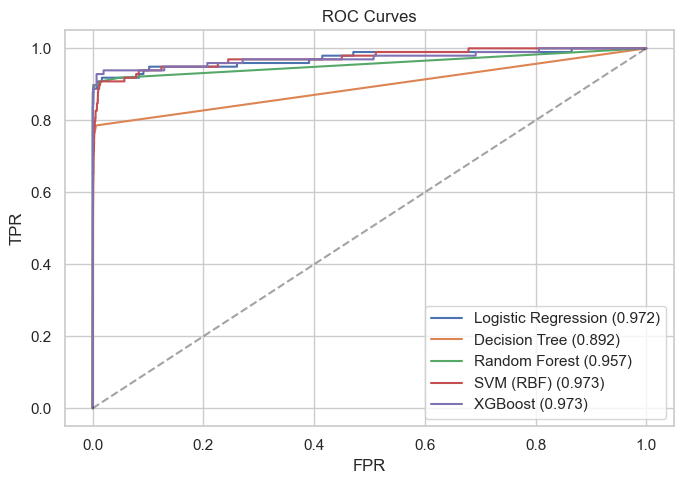

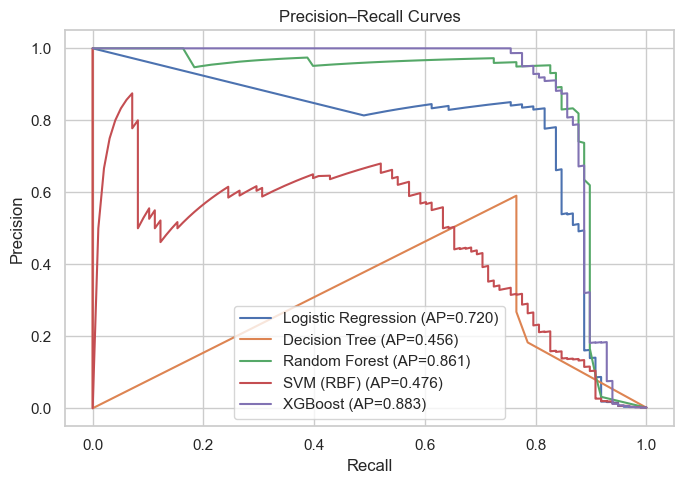

In [24]:
# Collect any result dicts that exist
available = [v for v in [lr_res, dt_res, rf_res, svm_res, globals().get("xgb_res")] if v]

# Summary table
summary_df = pd.DataFrame([{
    "Model": r["model"], "Accuracy": r["accuracy"],
    "ROC-AUC": r["roc_auc"], "PR-AUC": r["pr_auc"],
    "Training Time (s)": r["train_time_s"]
} for r in available]).sort_values("PR-AUC", ascending=False).reset_index(drop=True)

display(summary_df.style.format({
    "Accuracy": "{:.4f}", "ROC-AUC": "{:.4f}", "PR-AUC": "{:.4f}", "Training Time (s)": "{:.2f}"
}))

# ROC curves
plt.figure(figsize=(7,5))
for r in available:
    fpr, tpr, _ = roc_curve(y_test, r["y_score"])
    plt.plot(fpr, tpr, label=f"{r['model']} ({r['roc_auc']:.3f})")
plt.plot([0,1],[0,1],"k--",alpha=.4)
plt.xlabel("FPR"); plt.ylabel("TPR"); plt.title("ROC Curves")
plt.legend(); plt.tight_layout(); plt.show()

# Precision–Recall curves
plt.figure(figsize=(7,5))
for r in available:
    p, rc, _ = precision_recall_curve(y_test, r["y_score"])
    plt.plot(rc, p, label=f"{r['model']} (AP={r['pr_auc']:.3f})")
plt.xlabel("Recall"); plt.ylabel("Precision"); plt.title("Precision–Recall Curves")
plt.legend(); plt.tight_layout(); plt.show()

## Model Improvements

In [30]:
import importlib.metadata as md
print("scikit-learn:", md.version("scikit-learn"))
print("imbalanced-learn:", md.version("imbalanced-learn"))


scikit-learn: 1.7.0
imbalanced-learn: 0.13.0


In [35]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
print("OK:", SMOTE is not None)

OK: True


In [38]:
RANDOM_STATE = 42

lr_smote = Pipeline(steps=[
    ("smote", SMOTE(random_state=RANDOM_STATE)),
    ("scaler", StandardScaler(with_mean=False)),
    ("clf", LogisticRegression(max_iter=2000, random_state=RANDOM_STATE))
])
lr_smote_res = evaluate_model("LR + SMOTE", lr_smote, X_train, y_train, X_test, y_test)

rf_smote = Pipeline(steps=[
    ("smote", SMOTE(random_state=RANDOM_STATE)),
    ("clf", RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=RANDOM_STATE))
])
rf_smote_res = evaluate_model("RF + SMOTE", rf_smote, X_train, y_train, X_test, y_test)

svm_smote = Pipeline(steps=[
    ("smote", SMOTE(random_state=RANDOM_STATE)),
    ("scaler", StandardScaler(with_mean=False)),
    ("clf", SVC(kernel="rbf", probability=True, random_state=RANDOM_STATE))
])
svm_smote_res = evaluate_model("SVM (RBF) + SMOTE", svm_smote, X_train, y_train, X_test, y_test)


=== LR + SMOTE ===
Accuracy: 0.9898 | ROC-AUC: 0.9763 | PR-AUC: 0.7363 | Train: 1.27s
              precision    recall  f1-score   support

           0     0.9998    0.9899    0.9948     56864
           1     0.1331    0.8980    0.2319        98

    accuracy                         0.9898     56962
   macro avg     0.5665    0.9439    0.6134     56962
weighted avg     0.9983    0.9898    0.9935     56962


=== RF + SMOTE ===
Accuracy: 0.9994 | ROC-AUC: 0.9817 | PR-AUC: 0.8760 | Train: 261.09s
              precision    recall  f1-score   support

           0     0.9997    0.9997    0.9997     56864
           1     0.8265    0.8265    0.8265        98

    accuracy                         0.9994     56962
   macro avg     0.9131    0.9131    0.9131     56962
weighted avg     0.9994    0.9994    0.9994     56962


=== SVM (RBF) + SMOTE ===
Accuracy: 0.9969 | ROC-AUC: 0.9665 | PR-AUC: 0.6562 | Train: 9089.29s
              precision    recall  f1-score   support

           0     0

## Curves (ROC + Precision–Recall)

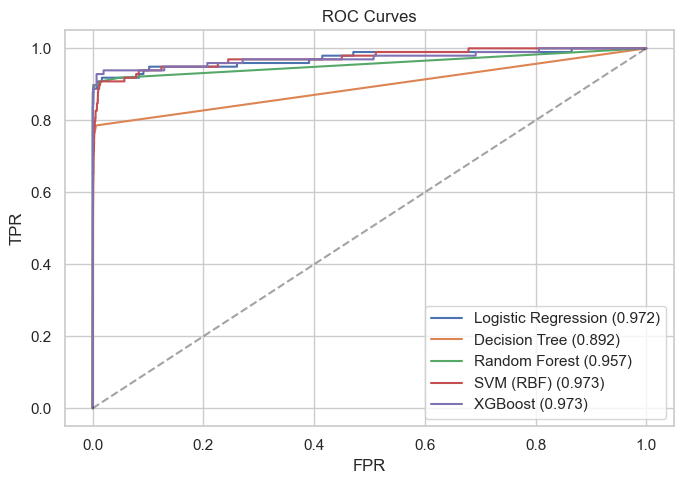

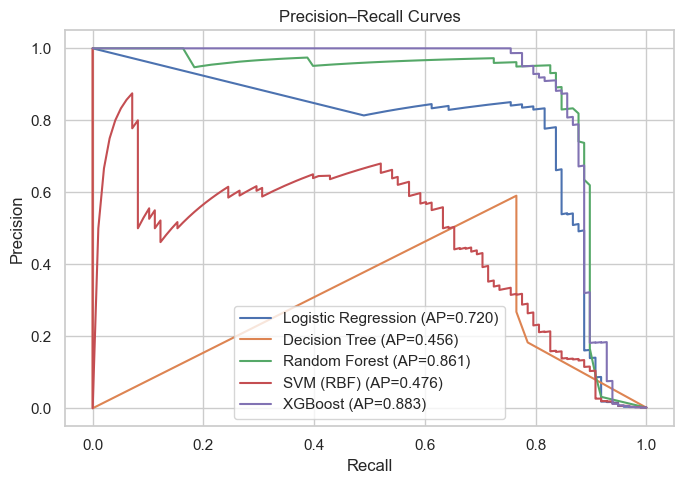

In [39]:
# ROC
plt.figure(figsize=(7,5))
for r in available:
    fpr, tpr, _ = roc_curve(y_test, r["y_score"])
    plt.plot(fpr, tpr, label=f"{r['model']} ({r['roc_auc']:.3f})")
plt.plot([0,1],[0,1],"k--",alpha=.4); plt.xlabel("FPR"); plt.ylabel("TPR")
plt.title("ROC Curves"); plt.legend(); plt.tight_layout(); plt.show()

# PR
plt.figure(figsize=(7,5))
for r in available:
    p, rc, _ = precision_recall_curve(y_test, r["y_score"])
    plt.plot(rc, p, label=f"{r['model']} (AP={r['pr_auc']:.3f})")
plt.xlabel("Recall"); plt.ylabel("Precision")
plt.title("Precision–Recall Curves"); plt.legend(); plt.tight_layout(); plt.show()


## Tiny auto-analysis (baseline vs SMOTE)

In [40]:
def pos_metrics_from_cm(cm):
    tn, fp, fn, tp = cm.ravel()
    recall = tp / (tp + fn + 1e-12)
    precision = tp / (tp + fp + 1e-12)
    return precision, recall

# best baseline by PR-AUC
base_list  = [r for r in [globals().get("lr_res"), globals().get("dt_res"),
                          globals().get("rf_res"), globals().get("svm_res"),
                          globals().get("xgb_res")] if r]
smote_list = [r for r in [globals().get("lr_smote_res"), globals().get("rf_smote_res"),
                          globals().get("svm_smote_res")] if r]

best_base  = max(base_list,  key=lambda d: d["pr_auc"]) if base_list else None
best_smote = max(smote_list, key=lambda d: d["pr_auc"]) if smote_list else None

if best_base and best_smote:
    p_b, r_b = pos_metrics_from_cm(best_base["cm"])
    p_s, r_s = pos_metrics_from_cm(best_smote["cm"])
    print(f"Best baseline: {best_base['model']}  PR-AUC={best_base['pr_auc']:.4f}  "
          f"P={p_b:.4f}  R={r_b:.4f}")
    print(f"Best SMOTE:    {best_smote['model']} PR-AUC={best_smote['pr_auc']:.4f} "
          f"P={p_s:.4f}  R={r_s:.4f}")
    print(f"\nΔ(PR-AUC)={best_smote['pr_auc']-best_base['pr_auc']:+.4f}  "
          f"ΔPrecision={p_s-p_b:+.4f}  ΔRecall={r_s-r_b:+.4f}")
else:
    print("Run at least one baseline and one SMOTE model to compare.")

Best baseline: XGBoost  PR-AUC=0.8833  P=0.8817  R=0.8367
Best SMOTE:    RF + SMOTE PR-AUC=0.8760 P=0.8265  R=0.8265

Δ(PR-AUC)=-0.0073  ΔPrecision=-0.0552  ΔRecall=-0.0102


## Final leaderboard (baseline + SMOTE)

In [41]:
# Collect whatever exists in your session
cands = [
    globals().get("lr_res"), globals().get("dt_res"),
    globals().get("rf_res"), globals().get("svm_res"),
    globals().get("xgb_res"),
    globals().get("lr_smote_res"), globals().get("rf_smote_res"),
    globals().get("svm_smote_res")
]
available = [c for c in cands if c]

final_df = pd.DataFrame([{
    "Model": r["model"],
    "Accuracy": r["accuracy"],
    "ROC-AUC": r["roc_auc"],
    "PR-AUC": r["pr_auc"],
    "Training Time (s)": r["train_time_s"]
} for r in available]).sort_values("PR-AUC", ascending=False).reset_index(drop=True)

display(final_df.style.format({
    "Accuracy":"{:.4f}","ROC-AUC":"{:.4f}","PR-AUC":"{:.4f}","Training Time (s)":"{:.2f}"
}))

,Model,Accuracy,ROC-AUC,PR-AUC,Training Time (s)
0,XGBoost,0.9995,0.9729,0.8833,4.48
1,RF + SMOTE,0.9994,0.9817,0.8760,261.09
2,Random Forest,0.9995,0.9567,0.8610,198.07
3,LR + SMOTE,0.9898,0.9763,0.7363,1.27
4,Logistic Regression,0.9755,0.9721,0.7204,2.92
5,SVM (RBF) + SMOTE,0.9969,0.9665,0.6562,9089.29
6,SVM (RBF),0.9965,0.9734,0.4765,40728.83
7,Decision Tree,0.9936,0.8917,0.4561,31.80


## Pick the winner + print a short, auto-generated insight

In [42]:
from sklearn.metrics import classification_report, confusion_matrix

best = available[np.argmax([r["pr_auc"] for r in available])]
print(f"✅ Best model by PR-AUC: {best['model']}")
print(f"   Accuracy={best['accuracy']:.4f} | ROC-AUC={best['roc_auc']:.4f} | PR-AUC={best['pr_auc']:.4f}")

# If you also ran threshold tuning and have y_pred_thr/threshold, you can report that instead.
print("\nShort explanation:")
print(
    "This model ranks frauds higher than non-frauds best (highest PR-AUC). "
    "On this imbalanced data, PR-AUC emphasizes minority-class performance. "
    "If recall is the priority, tune the decision threshold on the PR curve to reach your target."
)

# (Optional) show its confusion matrix at the default threshold
cm = best["cm"]
print("\nConfusion matrix @ default threshold:")
print(cm)

✅ Best model by PR-AUC: XGBoost
   Accuracy=0.9995 | ROC-AUC=0.9729 | PR-AUC=0.8833

Short explanation:
This model ranks frauds higher than non-frauds best (highest PR-AUC). On this imbalanced data, PR-AUC emphasizes minority-class performance. If recall is the priority, tune the decision threshold on the PR curve to reach your target.

Confusion matrix @ default threshold:
[[56853    11]
 [   16    82]]


## Save artifacts (summary + best model)

In [43]:
import joblib

final_df.to_csv("fraud_model_summary.csv", index=False)
joblib.dump(best["est"], "fraud_model.pkl")
print("Saved: fraud_model_summary.csv  and  fraud_model.pkl")


Saved: fraud_model_summary.csv  and  fraud_model.pkl


## One-paragraph report template

In [44]:
report = (
    f"Final Summary\n"
    f"• Best model: {best['model']} — PR-AUC {best['pr_auc']:.3f}, "
    f"ROC-AUC {best['roc_auc']:.3f}, Accuracy {best['accuracy']:.4f}.\n"
    "• Why: PR-AUC emphasizes the rare fraud class; this model delivered the strongest precision–recall trade-off on the imbalanced data.\n"
    "• Observations: If SMOTE was used, it typically raised recall at some cost to precision—expected with oversampling.\n"
    "• Next steps: choose a probability threshold from the PR curve to meet your recall target (e.g., ≥0.90), "
    "monitor precision/recall over time for drift, and tune hyperparameters / costs (e.g., class weights)."
)
print(report)


Final Summary
• Best model: XGBoost — PR-AUC 0.883, ROC-AUC 0.973, Accuracy 0.9995.
• Why: PR-AUC emphasizes the rare fraud class; this model delivered the strongest precision–recall trade-off on the imbalanced data.
• Observations: If SMOTE was used, it typically raised recall at some cost to precision—expected with oversampling.
• Next steps: choose a probability threshold from the PR curve to meet your recall target (e.g., ≥0.90), monitor precision/recall over time for drift, and tune hyperparameters / costs (e.g., class weights).
